In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données

In [6]:
df = pd.read_csv('data_projet/MilwaukeePropertySalesData.csv')

# Affichage d'un aperçu des données

In [14]:
df['FinishedSqft'].describe()

count      5805.000000
mean       2052.659948
std        5753.813684
min           0.000000
25%        1073.000000
50%        1368.000000
75%        1960.000000
max      280872.000000
Name: FinishedSqft, dtype: float64

# ---------------------------------------------------------------------
# Question 1 : Identification et suppression des valeurs extrêmes
# ---------------------------------------------------------------------


## Étape 1 : Calcul des limites

In [23]:
# Calcul des quartiles
Q1 = df['FinishedSqft'].quantile(0.25)  # 25e percentile
Q3 = df['FinishedSqft'].quantile(0.75)  # 75e percentile
IQR = Q3 - Q1                           # Calcul de l'IQR

# Définition des limites
lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure

print(f"Limite inférieure : {lower_bound}, Limite supérieure : {upper_bound}")


Limite inférieure : -257.5, Limite supérieure : 3290.5


## Étape 3 : Identifier les valeurs extrêmes

In [26]:
# Filtre des valeurs extrêmes
outliers = df[(df['FinishedSqft'] < lower_bound) | (df['FinishedSqft'] > upper_bound)]

print(f"Nombre de valeurs extrêmes : {len(outliers)}")
print(outliers[['FinishedSqft']])


Nombre de valeurs extrêmes : 329
      FinishedSqft
0          12960.0
26          3738.0
34         21675.0
75          3700.0
77          4936.0
...            ...
5690       28079.0
5756        4778.0
5758        4358.0
5796       10870.0
5797       18953.0

[329 rows x 1 columns]


## Étape 4 : Nettoyage des données

In [29]:
# Garder uniquement les valeurs dans les limites
df_cleaned = df[(df['FinishedSqft'] >= lower_bound) & (df['FinishedSqft'] <= upper_bound)]

print(f"Taille des données nettoyées : {df_cleaned.shape}")


Taille des données nettoyées : (5476, 21)


##  Étape 5 : Visualisation pour confirmer

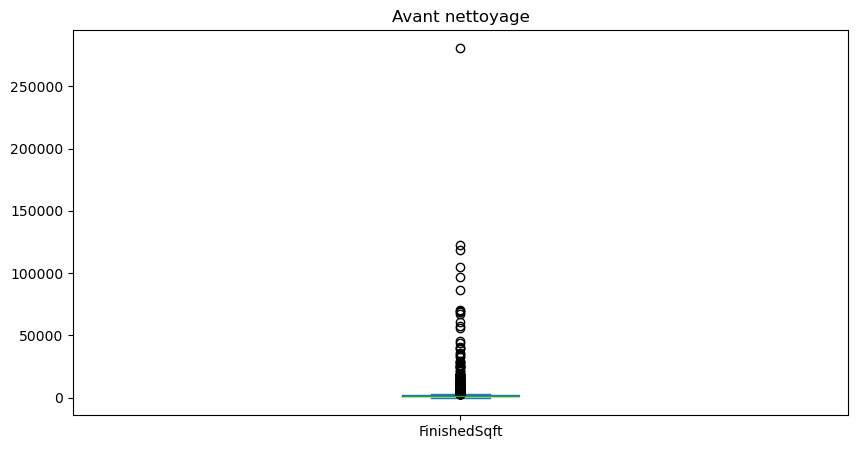

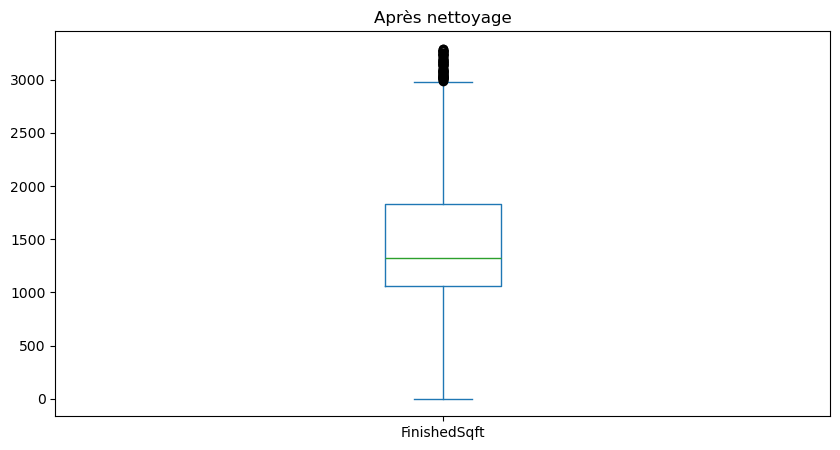

In [32]:

# Avant nettoyage
plt.figure(figsize=(10, 5))
df['FinishedSqft'].plot(kind='box', title='Avant nettoyage')

# Après nettoyage
plt.figure(figsize=(10, 5))
df_cleaned['FinishedSqft'].plot(kind='box', title='Après nettoyage')

plt.show()
